# <div style="color:white;background-color:#1d1545;padding:5%;font-size:1.3em;text-align:center;text-shadow:2px 2px 4px black"> Introduction </div>

This notebook is intended to explore the data about large corporate business reacting to the cruel war in Ukraine in terms of them either withdrawing their operations from russia or continueing to do the 'business as usual'.

Such data are packaged as a Kaggle dataset per https://www.kaggle.com/datasets/stereobooster/yale-som . Such a dataset itself is the authorized copy of the original Yale SOM dataset per https://som.yale.edu/story/2022/over-1000-companies-have-curtailed-operations-russia-some-remain

Here is the summary about the dataset from its publishing team at Yale, "Since the invasion of Ukraine began, we have been tracking the responses of well over 1,200 companies, and counting. Over 1,000 companies have publicly announced they are voluntarily curtailing operations in Russia to some degree beyond the bare minimum legally required by international sanctions — but some companies have continued to operate in Russia undeterred. 

Originally a simple "withdraw" vs. "remain" list, our list of companies now consists of five categories—graded on a school-style letter grade scale of A-F for the completeness of withdrawal. 

The list below is updated continuously by Jeffrey Sonnenfeld and his team of experts, research fellows, and students at the Yale Chief Executive Leadership Institute to reflect new announcements from companies in as close to real time as possible."


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.offline

In [2]:
# set the size of the geo bubble
def set_size(value):
    '''
    Takes the numeric value of a parameter to visualize on a map (Plotly Geo-Scatter plot)
    Returns a number to indicate the size of a bubble for a country which numeric attribute value 
    was supplied as an input
    '''
    result = np.log(1+value/10)
    if result < 0:
        result = 0.001
    return result

# cascatter implementation - reused from https://github.com/myrthings/catscatter/blob/master/catscatter.py
# (c) Myr Barnés, 2020
# More info about this function is available at
# - https://towardsdatascience.com/visualize-categorical-relationships-with-catscatter-e60cdb164395
# - https://github.com/myrthings/catscatter/blob/master/README.md
def catscatter(df,colx,coly,cols,color=['grey','black'],ratio=10,font='Helvetica',save=False,save_name='Default'):
    '''
    Goal: This function create an scatter plot for categorical variables. It's useful to compare two lists with elements in common.
    Input:
        - df: required. pandas DataFrame with at least two columns with categorical variables you want to relate, and the value of both (if it's just an adjacent matrix write 1)
        - colx: required. The name of the column to display horizontaly
        - coly: required. The name of the column to display vertically
        - cols: required. The name of the column with the value between the two variables
        - color: optional. Colors to display in the visualization, the length can be two or three. The two first are the colors for the lines in the matrix, the last one the font color and markers color.
            default ['grey','black']
        - ratio: optional. A ratio for controlling the relative size of the markers.
            default 10
        - font: optional. The font for the ticks on the matrix.
            default 'Helvetica'
        - save: optional. True for saving as an image in the same path as the code.
            default False
        - save_name: optional. The name used for saving the image (then the code ads .png)
            default: "Default"
    Output:
        No output. Matplotlib object is not shown by default to be able to add more changes.
    '''
    # Create a dict to encode the categeories into numbers (sorted)
    colx_codes=dict(zip(df[colx].sort_values().unique(),range(len(df[colx].unique()))))
    coly_codes=dict(zip(df[coly].sort_values(ascending=False).unique(),range(len(df[coly].unique()))))
    
    # Apply the encoding
    df[colx]=df[colx].apply(lambda x: colx_codes[x])
    df[coly]=df[coly].apply(lambda x: coly_codes[x])
    
    
    # Prepare the aspect of the plot
    plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = False
    plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True
    plt.rcParams['font.sans-serif']=font
    plt.rcParams['xtick.color']=color[-1]
    plt.rcParams['ytick.color']=color[-1]
    plt.box(False)

    
    # Plot all the lines for the background
    for num in range(len(coly_codes)):
        plt.hlines(num,-1,len(colx_codes)+1,linestyle='dashed',linewidth=1,color=color[num%2],alpha=0.5)
    for num in range(len(colx_codes)):
        plt.vlines(num,-1,len(coly_codes)+1,linestyle='dashed',linewidth=1,color=color[num%2],alpha=0.5)
        
    # Plot the scatter plot with the numbers
    plt.scatter(df[colx],
               df[coly],
               s=df[cols]*ratio,
               zorder=2,
               color=color[-1])
    
    # Change the ticks numbers to categories and limit them
    plt.xticks(ticks=list(colx_codes.values()),labels=colx_codes.keys(),rotation=90)
    plt.yticks(ticks=list(coly_codes.values()),labels=coly_codes.keys())
    plt.xlim(xmin=-1,xmax=len(colx_codes))
    plt.ylim(ymin=-1,ymax=len(coly_codes))
    
    # Save if wanted
    if save:
        plt.savefig(save_name+'.png')


# <div style="color:white;background-color:#1d1545;padding:5%;font-size:1.3em;text-align:center;text-shadow:2px 2px 4px black"> Reading Data Into Memory </div>

In [3]:
run_locally = True
if run_locally:
    dataset_path = './data.csv'
else:
    dataset_path = '../input/yale-som/data.csv'

df = pd.read_csv(dataset_path)
df.head(10)

name  \
0                       Acerinox   
1                         Agrana   
2     Agricultural Bank of China   
3  Aimbridge | Interstate Hotels   
4                      Air China   
5                     Air Serbia   
6                        Alibaba   
7               Align Technology   
8                    Alpina Žiri   
9                         Alumil   

                                              action yaleGrade countryAlpha2  \
0                          still operating in Russia         f            ES   
1                 continue operating plant in Russia         f            AT   
2  Russian companies open accounts with the bank;...         f            CN   
3                          still operating in Russia         f            US   
4                             still flying to Russia         f            CN   
5                             still flying to Russia         f            RS   
6                          still operating in Russia         f            CN   
7                          still operating in Russia         f            US   
8                             distributors in Russia         f            SI   
9                             Not disclosed publicly         f            GR   

         country                industry  
0          Spain               Materials  
1        Austria        Consumer Staples  
2          China              Financials  
3  United States  Consumer Discretionary  
4          China             Industrials  
5         Serbia             Industrials  
6          China  Consumer Discretionary  
7  United States             Health Care  
8       Slovenia  Consumer Discretionary  
9         Greece               Materials

# <div style="color:white;background-color:#1d1545;padding:5%;font-size:1.3em;text-align:center;text-shadow:2px 2px 4px black"> Reviewing and Imputing Missing Values </div>

In [4]:
df.info()
# check for null values in cols

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1388 entries, 0 to 1387
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           1388 non-null   object
 1   action         1386 non-null   object
 2   yaleGrade      1388 non-null   object
 3   countryAlpha2  1388 non-null   object
 4   country        1388 non-null   object
 5   industry       1385 non-null   object
dtypes: object(6)
memory usage: 65.2+ KB


As we can see, the small fraction of the records has missing values as follows
- three records have missing industry values
- two records have missing action values

Let's review such data in more details.

The records with missing action values are listed below

In [5]:
df_na = df[pd.isnull(df['action'])]
df_na

name action yaleGrade countryAlpha2  country  \
419                 Carl Zeiss    NaN         c            DE  Germany   
641  BUDVAR Centrum Sp. z.o.o.    NaN         b            PL   Poland   

        industry  
419  Health Care  
641  Industrials

We see it could be quite safe to impute the missing *action* values with the constant of 'Uknown', down the road.

Now, let's look at the missing values in *industry* attribute.

In [6]:
df_na = df[pd.isnull(df['industry'])]
df_na

name  \
134  Lifestyle Production Group (LPG)   
190   Soler & Palau Ventilation Group   
539                         Systemair   

                                               action yaleGrade countryAlpha2  \
134  Continuing to hire Russian employees for editing         f            US   
190         Business as usual, 15 listed distributors         f            ES   
539          Temporarily discontinuing all deliveries         c            SE   

           country industry  
134  United States      NaN  
190          Spain      NaN  
539         Sweden      NaN

Based on the quick Internet-based research, we can identify the industry for the above-mentioned three companies as follows

- [Lifestyle Production Group (LPG)](https://lifestyleproduction.com/) is a video production studio focused on the services to the luxury brands, and therefore we can classify it as *'Communication Services'* within the set of industries introduced by the authors of this dataset
- [Soler & Palau Ventilation Group](https://www.solerpalau.com/en-en/) is positioned as a manufacturer of the industrial and home  ventialation systems, and therefore it can be classified as *'Industrials'* within the set of industries introduced by the authors of this dataset
- [Systemair](https://www.systemair.com/) is a manufacturer to various air conditioning systems across the globe, and therefore it can be classified as *'Industrials'* within the set of industries introduced by the authors of this dataset

Now we are ready to impute missing values as per the discovereis/suggestions above

In [7]:
# fill NAs
df[['action']] = df[['action']].fillna('Uknonw')

df['industry'] = df.apply(lambda x: 'Industrials' if x['name']=='Systemair' else x['industry'], axis=1)
df['industry'] = df.apply(lambda x: 'Industrials' if x['name']=='Soler & Palau Ventilation Group' else x['industry'], axis=1)
df['industry'] = df.apply(lambda x: 'Communication Services' 
                          if x['name']=='Lifestyle Production Group (LPG)' else x['industry'], axis=1)

In [8]:
df_c = df[df['yaleGrade'] == 'c']
df_c.head(20)

name                                             action  \
392                  ABB  temporarily pausing all new orders and operati...   
393  Activision Blizzard    suspend new sales of and in our games in Russia   
394  ADEO | Leroy Merlin  Stopped new investments, imports, and financin...   
395                Adobe  suspend all new sales in Russia and Belarus; c...   
396                 AGCO                stop sale of new machines to Russia   
397            AkzoNobel  suspend new investments in Russia; end Aerospa...   
398              Allianz             meaningfully reduce exposure to Russia   
399             Alphabet  withdraw all operations in Moscow; stop taking...   
400     Amadeus IT Group                  suspend partnership with Aeroflot   
401                Amgen  suspend all non-essential business activities;...   
402               AmRest      suspend operations with some brands in Russia   
403                ASBIS           amends contracts following new sanctions   
404                 Aspo                      reducing operations in Russia   
405                Avaya  limit certain services; cease new maintenance ...   
406              Bacardi  paused exports to Russia but not domestic oper...   
407       Bank of Cyprus      maintain loan book; observe banking sanctions   
408           Beiersdorf  maintain skin and bodycare products; stop othe...   
409              Bekaert                      scale back business in Russia   
410      Black Red White  divesting from Russian subsidiary, still has a...   
411           BNY Mellon  suspend new business activity and investments;...   

    yaleGrade countryAlpha2        country                industry  
392         c            CH    Switzerland             Industrials  
393         c            US  United States  Communication Services  
394         c            FR         France  Consumer Discretionary  
395         c            US  United States  Information Technology  
396         c            US  United States             Industrials  
397         c            NL    Netherlands               Materials  
398         c            DE        Germany              Financials  
399         c            US  United States  Communication Services  
400         c            ES          Spain  Information Technology  
401         c            US  United States             Health Care  
402         c            ES          Spain  Consumer Discretionary  
403         c            CY         Cyprus  Information Technology  
404         c            FI        Finland             Industrials  
405         c            US  United States  Information Technology  
406         c            BM        Bermuda        Consumer Staples  
407         c            CY         Cyprus              Financials  
408         c            DE        Germany        Consumer Staples  
409         c            BE        Belgium             Industrials  
410         c            PL         Poland  Consumer Discretionary  
411         c            US  United States              Financials

# <div style="color:white;background-color:#1d1545;padding:5%;font-size:1.3em;text-align:center;text-shadow:2px 2px 4px black">Basic Data Explorations </div>

## <div style="font-size:20px;text-align:center;color:black;border-bottom:5px #0026d6 solid;padding-bottom:3%">Counting Companies by Yale Grade and Industry</div>

Before we run into the analysis/EDA in these dimentions, it is worth mentioning how the categories in *yaleGrade* are interpreted by the research team behind this dataset. So they see it as follows

- **Grade 'f'**: Defying Demands for Exit or Reduction of Activities; companies that are just continuing business-as-usual in Russia...
- **Grade 'd'**: Holding Off New Investments/Development; Companies postponing future planned investment/development/marketing while continuing substantive business...
- **Grade 'c'**: Reducing Current Operations; Companies that are scaling back some significant business operations but continuing some others...
- **Grade 'b'**: Keeping Options Open for Return; Companies temporarily curtailing most or nearly all operations while keeping return options open...
- **Grade 'a'**: Clean Break - Surgical Removal, Resection; Companies totally halting Russian engagements or completely exiting Russia...

In [9]:
# aggregate basis cat data for age and gender
agg_data = df.groupby(['yaleGrade', 'industry']).size().reset_index(name='company_count')


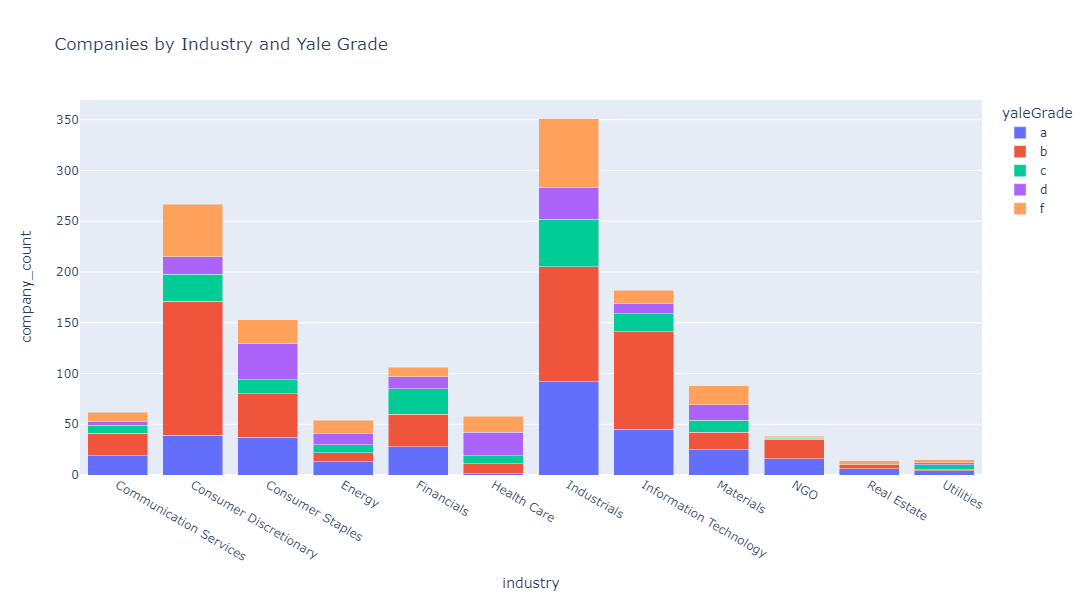

In [10]:
# aggregate basis cat data for age and gender
agg_data = df.groupby(['yaleGrade', 'industry']).size().reset_index(name='company_count')
fig = px.bar(
    agg_data, 
    x='industry', 
    y='company_count', 
    color='yaleGrade', 
    title="Companies by Industry and Yale Grade"
    , height=600
)
fig.update_layout(barmode='stack')
fig.update_xaxes(categoryorder='category ascending')
fig.show()

From the chart above, we find that

- The most of the companies in the dataset represent Industrials, Consumer Discretioanry, Information Technology and Consumer staples industries
- We can see that, within 4 leading industries, the amount of comnpanies taken actions to exit from russia (categories *a* and *b* in *yaleGrade*) is bigger than the amount of those who decided to continue the 'business as usual' in Industrials, Consumer Discretioanry, and Information Technology
- In turn, Consumer staples shows relatively equal amount of companies that withdrew from russian and ones that stayed
- Among the smaller-represented industries, we can also see some areas where there is a parity of the number of companies that withdrew and ones that continued to operate in russia (namely, these are Energy, Financials, and Materials)
- Amount of the companies in NGO, Real Estate, and Utilities is neglectably small, compared to other industries represented in the dataset

I am going to review the key industries in the deeper-dive manner in the sections below.

# <div style="color:white;background-color:#1d1545;padding:5%;font-size:1.3em;text-align:center;text-shadow:2px 2px 4px black"> Locations of Companies </div>

Now, let's review the geographic spread of companies in the dataset collected by the team of Yale researches.

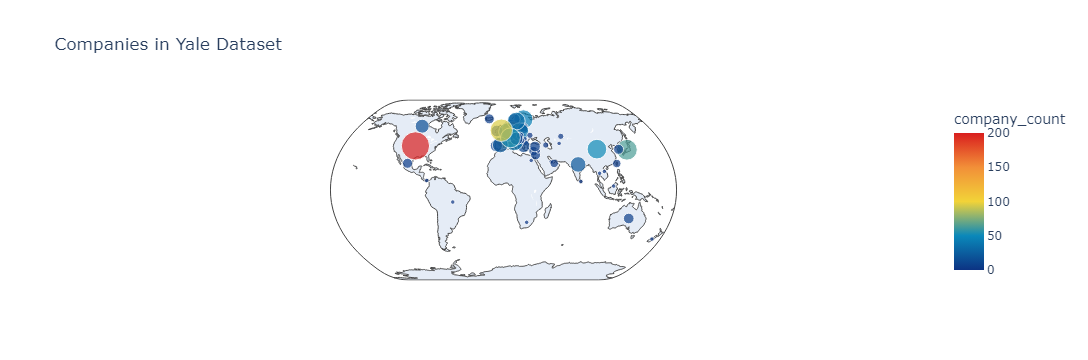

In [11]:
agg_data = df.groupby(['country']).size().reset_index(name='company_count')
agg_data['size'] = agg_data.apply(lambda x: set_size(x['company_count']), axis=1)

fig = px.scatter_geo(
    agg_data, locations="country", locationmode='country names', 
    color="company_count", 
    size='size', hover_name="country", 
    range_color= [0, 200], 
    projection="natural earth",
    title='Companies in Yale Dataset', 
    color_continuous_scale="portland")

fig.show()

Now, let's review the top 10 country list with the biggest amount of the companies in the scope of this research

In [12]:
agg_data.set_index('country')
agg_data.sort_values('company_count', 
                   ascending=False)[
                        [
                            'country',
                            'company_count'
                        ]
][:10].style.background_gradient(cmap='Oranges')

We can find out that

- US, Germany, and UK are the top three locations for the compnaies in the dataset
- other countries in top 10 list are  significantly below ones in the top 3 list, in terms of the number of the compnaies represented

# <div style="color:white;background-color:#1d1545;padding:5%;font-size:1.3em;text-align:center;text-shadow:2px 2px 4px black"> New Feature Engineering </div>


Although the original Yale Grade feature that comprises 5 categories, based on the researchers' appraisal of the extent a particular company stops its operations in/with russia, is quite informative, we believe the trends with the corporate decisions to either exit from russia-related activities in the leue of the cruel aggression/war in Ukraine or continue doing 'business as usual' can be better crystalize with more generic binary category (*still_operates*).

Another interesting-to-investigate area would be to compare decisions of the companies inside and outside the countries of G7. Therefore we invented a new binary categorical feature to indicate whether a company is established in a G7 country or not.

Let's run the feature engineering routines as well as review the  dataset after enriching it with the new features. 

In [13]:
def still_operates_in_russia(action: str, yale_grade: str) -> str:
    result = 'na'
    
    operational_keywords = ['still', 'uknonw']
    
    stop_keyworkds = ['withdraw', 'withdrawing', 'discontinuing']
    
    action_words = action.lower().split(' ')
    
    if yale_grade == 'f' or yale_grade == 'd':
        result = 'yes'
    elif yale_grade == 'a' or yale_grade == 'b':
        result = 'no'
    else:
        for word in action_words:
            if word in operational_keywords:
                result = 'yes'
                break
            elif word in stop_keyworkds:
                result = 'no'
                break
            else:
                result = 'yes'
    return result


def belongs_to_g7(country_code: str) -> str:
    result = 'Others'
    g7_list = ['US', 'FR', 'GB', 'DE', 'CA', 'JP', 'IT']
    if country_code in g7_list:
        result = 'G7'
    return result

df['still_operates'] = df.apply(lambda x: still_operates_in_russia(x['action'], x['yaleGrade']), axis=1)
df['G7'] = df.apply(lambda x: belongs_to_g7(x['countryAlpha2']), axis=1)
df.head(10)

name  \
0                       Acerinox   
1                         Agrana   
2     Agricultural Bank of China   
3  Aimbridge | Interstate Hotels   
4                      Air China   
5                     Air Serbia   
6                        Alibaba   
7               Align Technology   
8                    Alpina Žiri   
9                         Alumil   

                                              action yaleGrade countryAlpha2  \
0                          still operating in Russia         f            ES   
1                 continue operating plant in Russia         f            AT   
2  Russian companies open accounts with the bank;...         f            CN   
3                          still operating in Russia         f            US   
4                             still flying to Russia         f            CN   
5                             still flying to Russia         f            RS   
6                          still operating in Russia         f            CN   
7                          still operating in Russia         f            US   
8                             distributors in Russia         f            SI   
9                             Not disclosed publicly         f            GR   

         country                industry still_operates      G7  
0          Spain               Materials            yes  Others  
1        Austria        Consumer Staples            yes  Others  
2          China              Financials            yes  Others  
3  United States  Consumer Discretionary            yes      G7  
4          China             Industrials            yes  Others  
5         Serbia             Industrials            yes  Others  
6          China  Consumer Discretionary            yes  Others  
7  United States             Health Care            yes      G7  
8       Slovenia  Consumer Discretionary            yes  Others  
9         Greece               Materials            yes  Others

# <div style="color:white;background-color:#1d1545;padding:5%;font-size:1.3em;text-align:center;text-shadow:2px 2px 4px black"> Advanced EDA </div>

In the sections below, we are going to explore deeper associations between the categorical variables in this dataset.

## <div style="font-size:20px;text-align:center;color:black;border-bottom:5px #0026d6 solid;padding-bottom:3%">Association Between Industry and Extent to Exit From Russia</div>

Let's look at the associations between the industry and the grade to exit from russia (that is, *yaleGrade*).

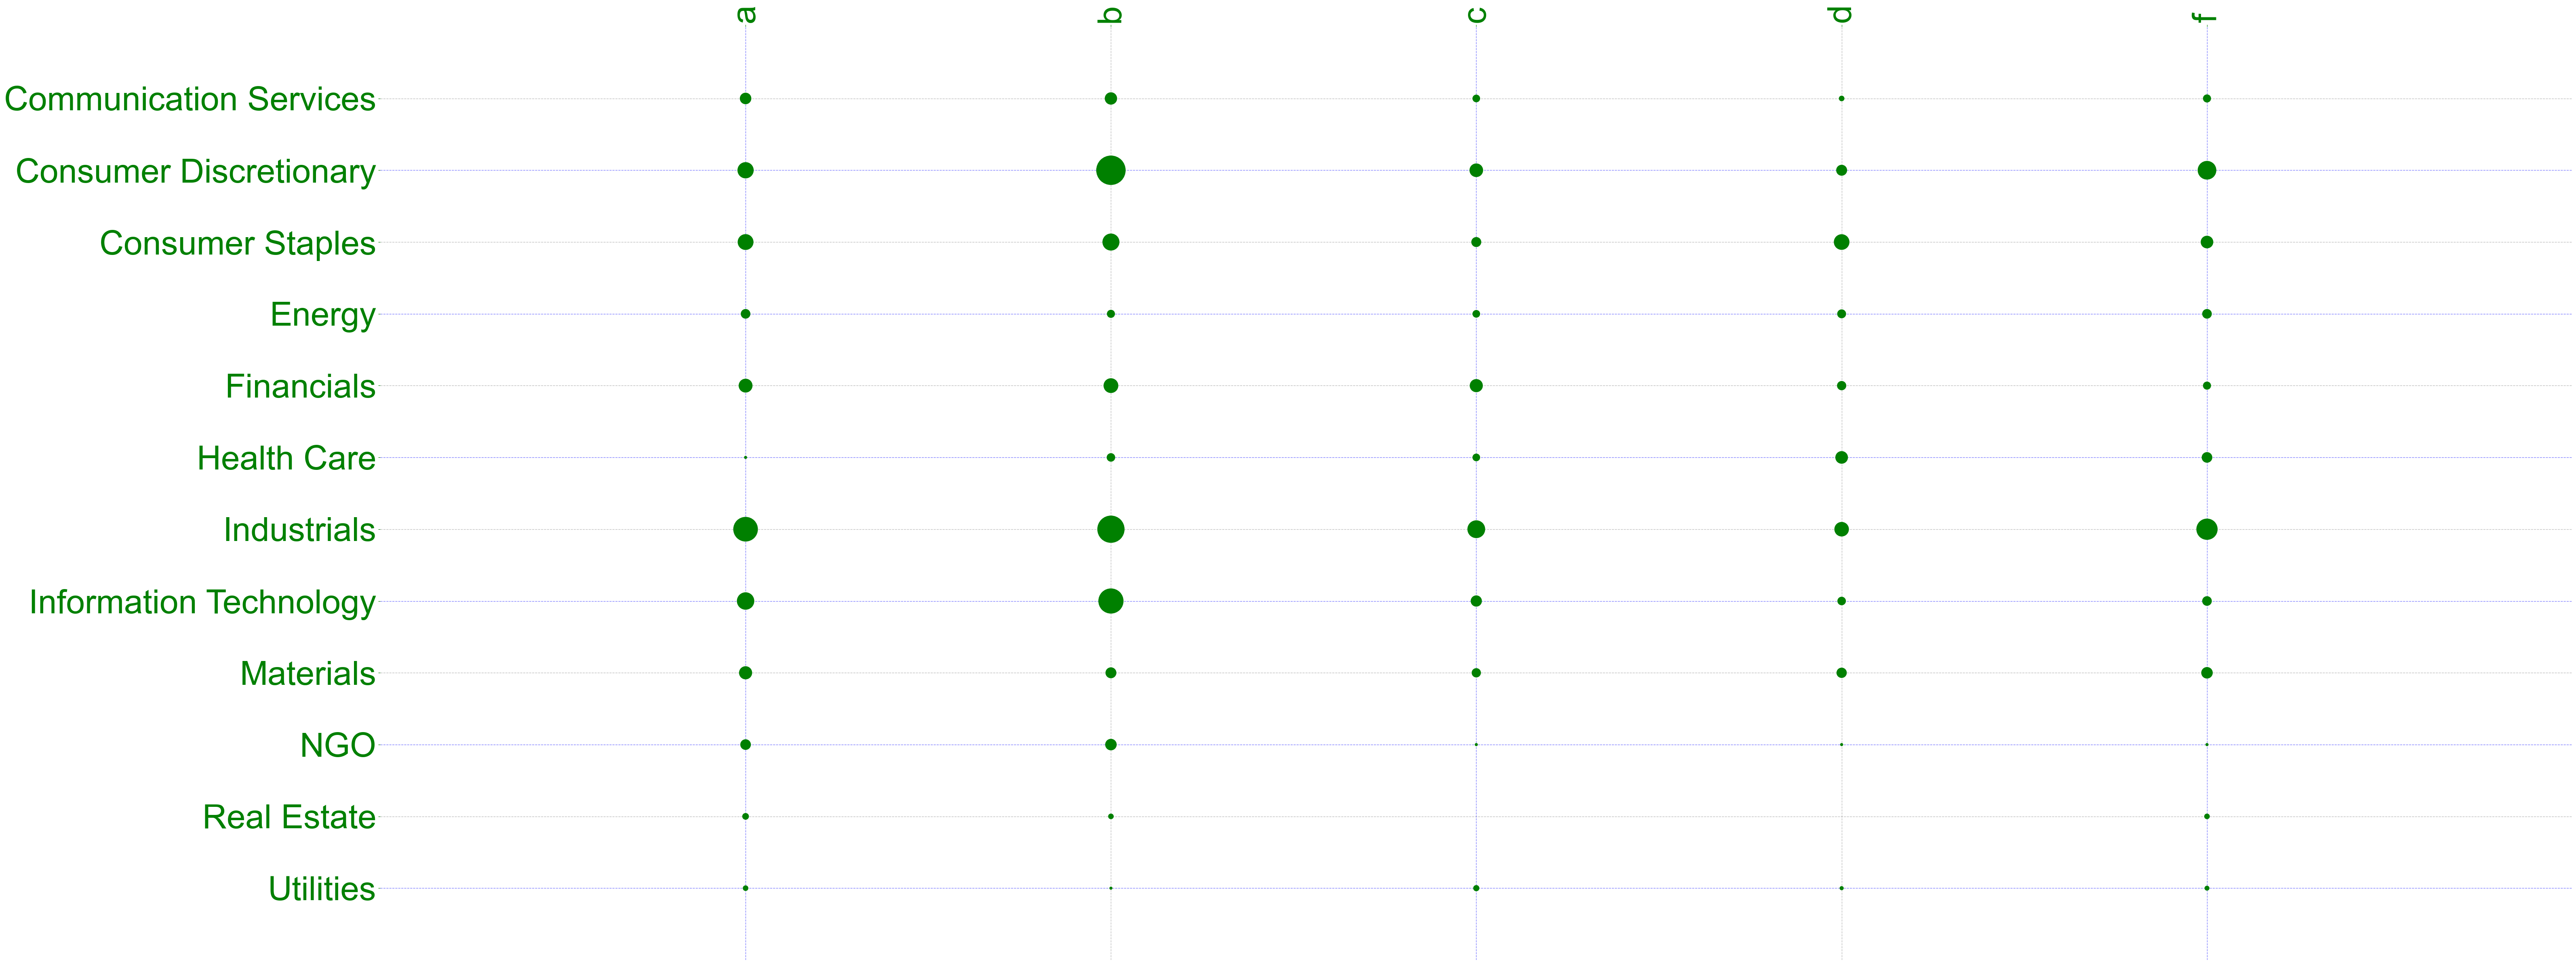

In [14]:
# aggregate basis cat data for industry and yaleGrade
agg_data = df.groupby(['industry','yaleGrade']).size().reset_index(name='company_count')

colors=['blue', 'grey', 'green']
# create the plot
plt.figure(figsize=(70,30))
catscatter(agg_data , 'yaleGrade', 'industry', 'company_count', font='Arial', color=colors, ratio=20)

plt.xticks(fontsize=60)
plt.yticks(fontsize=60)
plt.show()

Now let's look at such an association, using the aggregated synthetic flag we invented as a new feature (that is, *still_operates*).

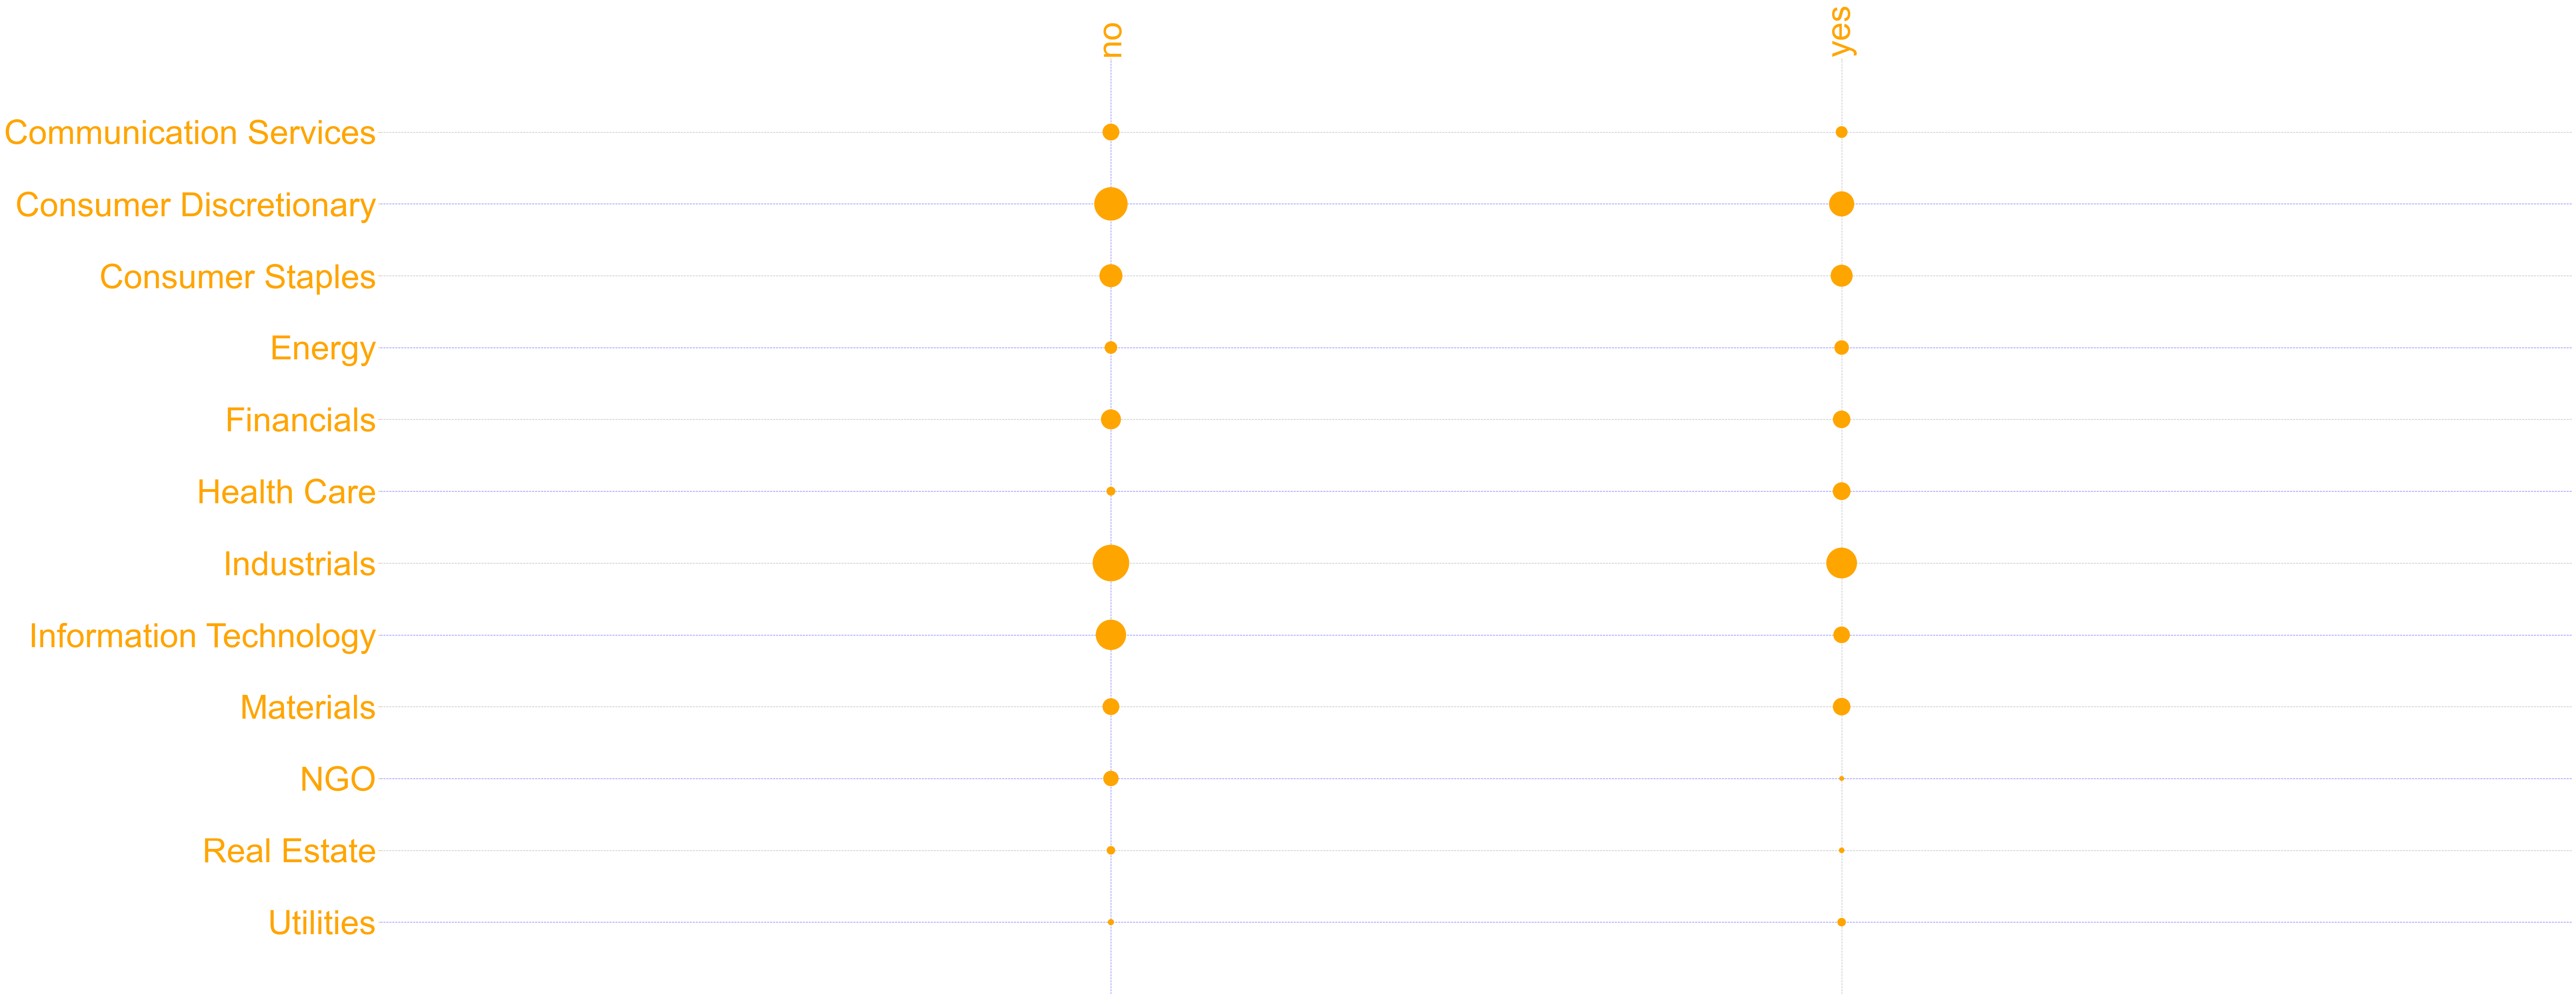

In [15]:
# aggregate basis cat data for industry and still_operates
agg_data = df.groupby(['industry','still_operates']).size().reset_index(name='company_count')

colors=['blue', 'grey', 'orange']
# create the plot
plt.figure(figsize=(70,30))
catscatter(agg_data , 'still_operates', 'industry', 'company_count', font='Arial', color=colors, ratio=20)

plt.xticks(fontsize=60)
plt.yticks(fontsize=60)
plt.show()

Based on the review of the two charts above, we can draw the insights below

- there are industries where the business decision to exit from russia pre-dominated among the industry leaders (there are, for example, Information Technologies, Consumer Discretionary, Communication Services, Industrials, and NGO)
- there are equally other idustries where there is a parity on the decision to either exit or stay operating in/with russia (Consumer Staples, Energy, Financials, Materials)
- in Healthcare, the  number of companies decided to stay in russia exceeds the number of those who have chosen to exit from the country
- the biggest clusters of companies classified with the most russia-tolerant grade (*yaleGrade = 'f'*) are in Industrials and Consumer Discretionary induestries

In our deeper dives down the road, we will review the patterns to do the 'business as usual' in the industries below
- Consumer Discretionary
- Consumer Staples
- Energy
- Financials
- Health Care
- Industrials
- Materials

## <div style="font-size:20px;text-align:center;color:black;border-bottom:5px #0026d6 solid;padding-bottom:3%">Association Between G7 Membership and Extent to Exit From Russia</div>

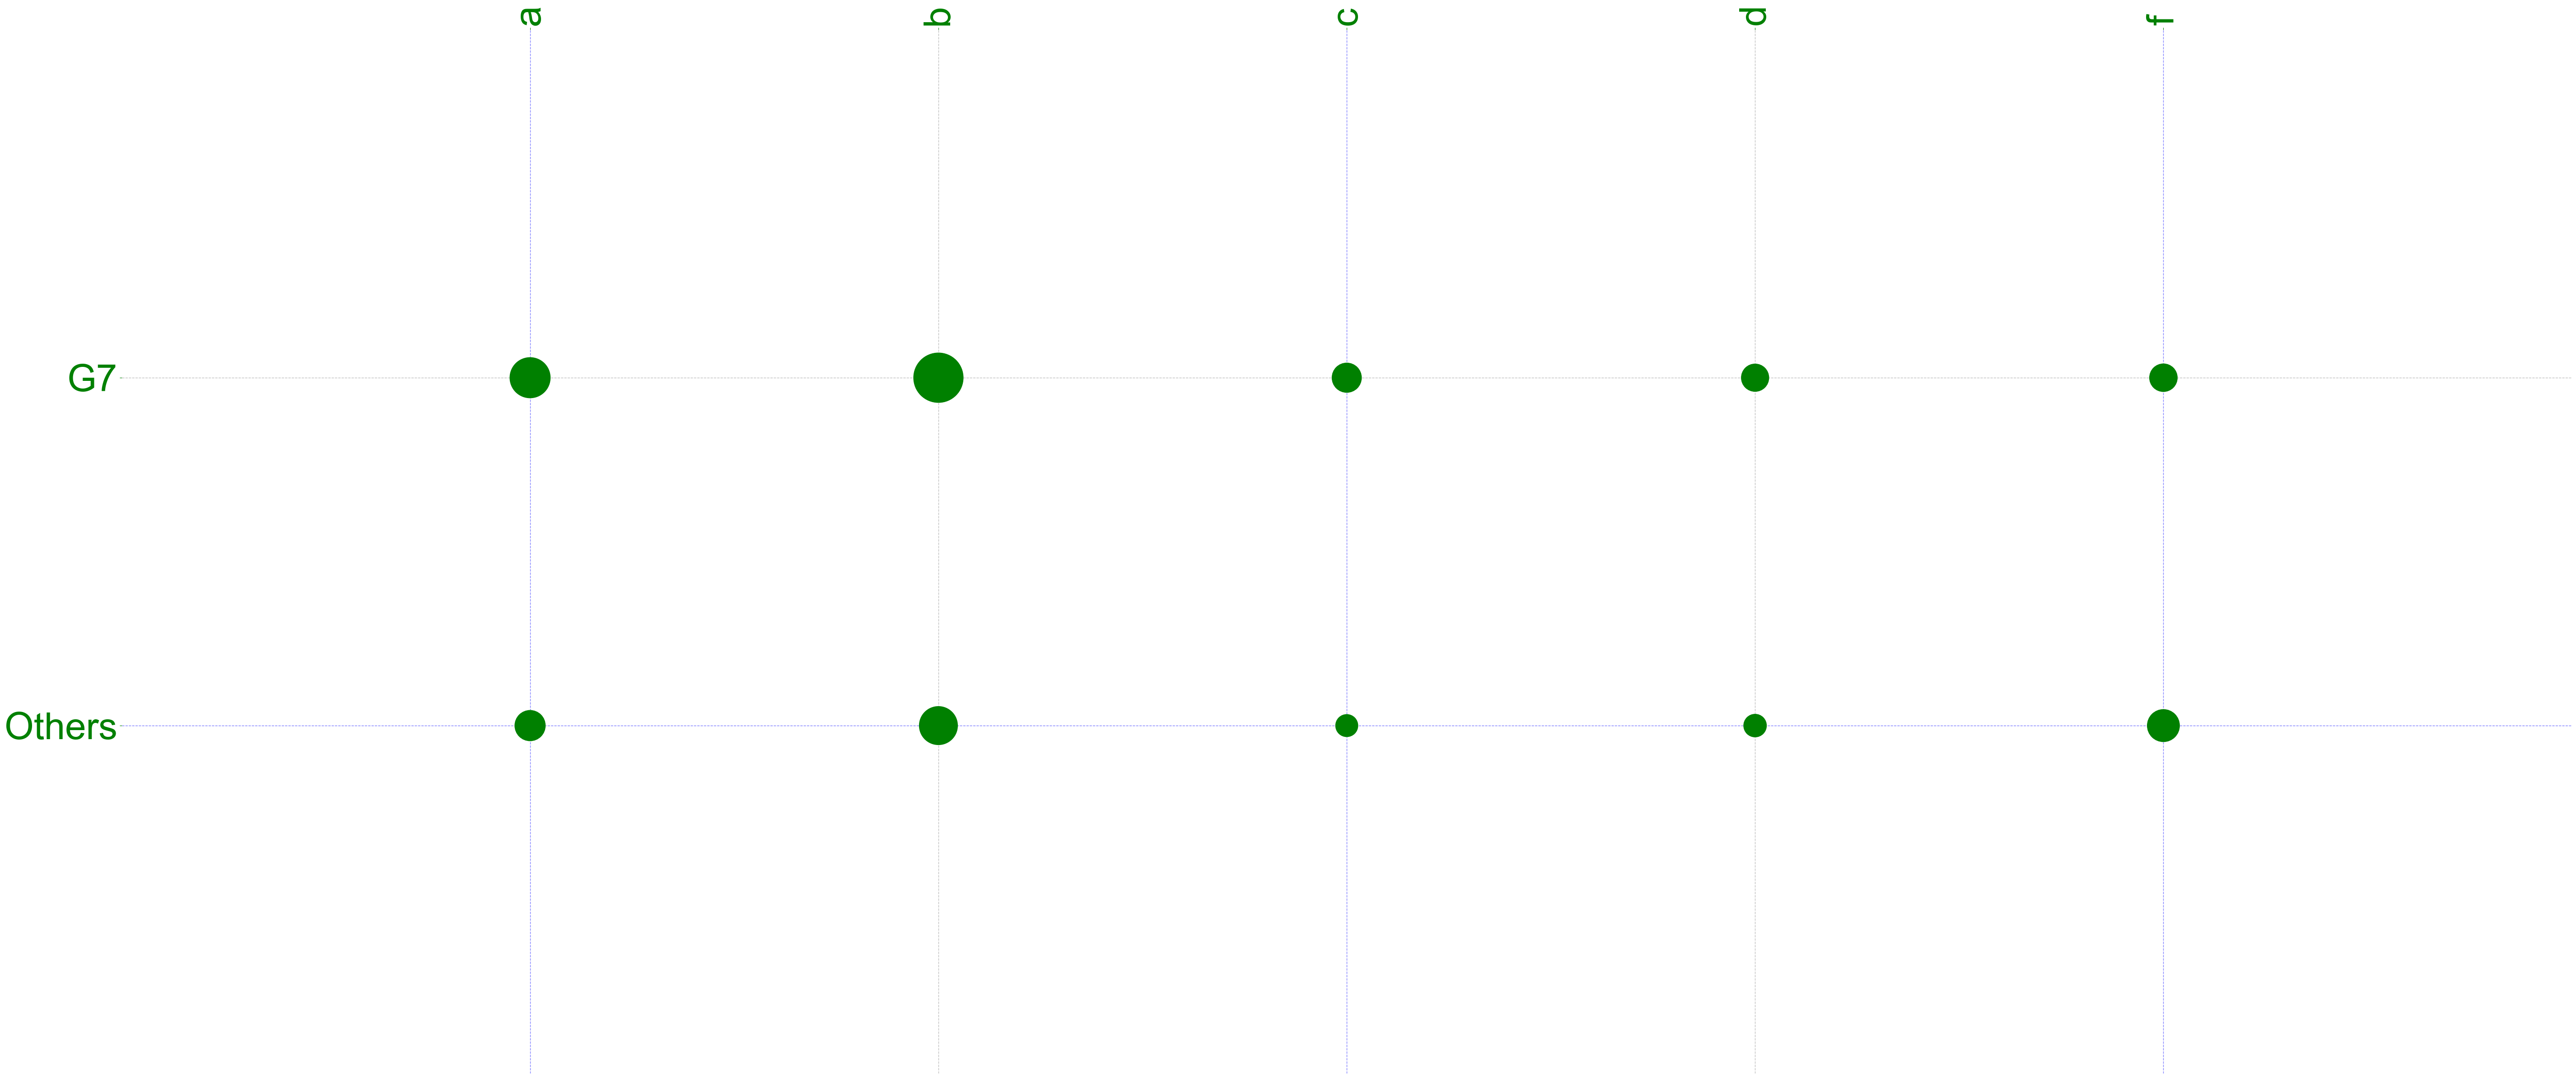

In [16]:
# aggregate basis cat data for G7 membership of the country of the company headquarters and yaleGrade
agg_data = df.groupby(['G7','yaleGrade']).size().reset_index(name='company_count')

colors=['blue', 'grey', 'green']
# create the plot
plt.figure(figsize=(70,30))
catscatter(agg_data , 'yaleGrade', 'G7', 'company_count', font='Arial', color=colors, ratio=20)

plt.xticks(fontsize=60)
plt.yticks(fontsize=60)
plt.show()

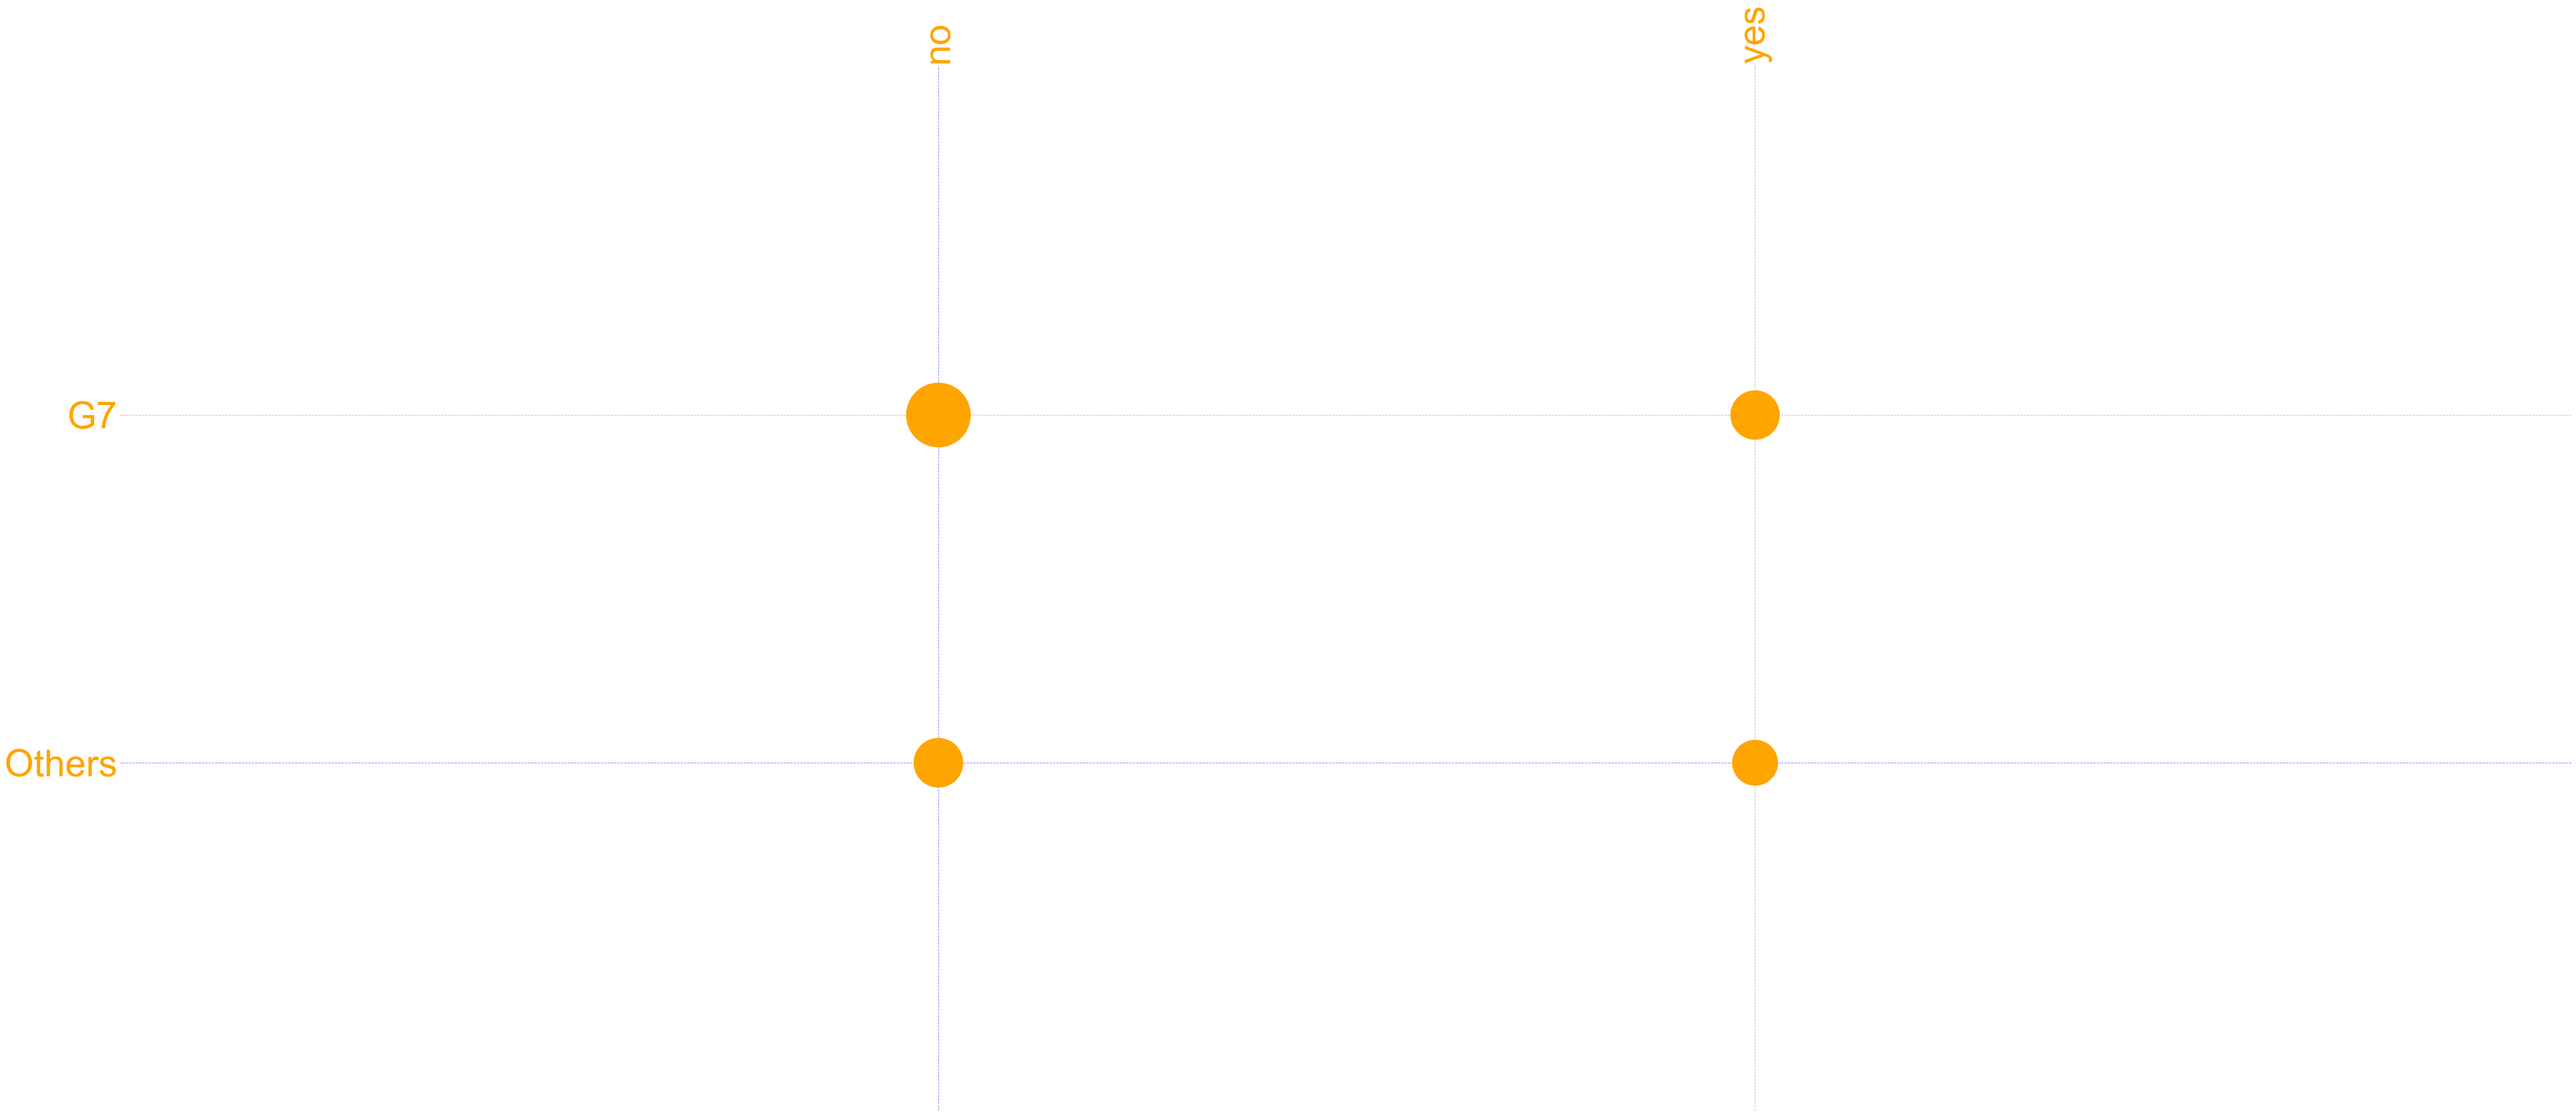

In [17]:
# aggregate basis cat data for G7 membership of the country of the company headquarters and still_operates
agg_data = df.groupby(['G7','still_operates']).size().reset_index(name='company_count')

colors=['blue', 'grey', 'orange']
# create the plot
plt.figure(figsize=(70,30))
catscatter(agg_data , 'still_operates', 'G7', 'company_count', font='Arial', color=colors, ratio=20)

plt.xticks(fontsize=60)
plt.yticks(fontsize=60)
plt.show()

As we can see, the fraction of companies who decided to withdraw from russia is much bigger amoung G7 countries vs. other countries across the globe.

It is also essential to note that not only value-driven decision-making catalyzes the entire process of withdrawing from russia. It is often the policy-driven pressure on those how simply like to do their 'business as usual'. Such companies are catalized to suspend their operations in russia in order to avoid the effect of the secondary sanctions rather then because they share the values of the good people to counter-fight the evil russian terrorism.

**Note:** Far more to tell about it, the  total withdrawal in certain industries is not feasible for 100%. It will be discussed in more review in our deeper dive into Engergy sector down the road.

## <div style="font-size:20px;text-align:center;color:black;border-bottom:5px #0026d6 solid;padding-bottom:3%">Deeper Outlook On Extent-to-Exit, Industry and G7 Membership</div>

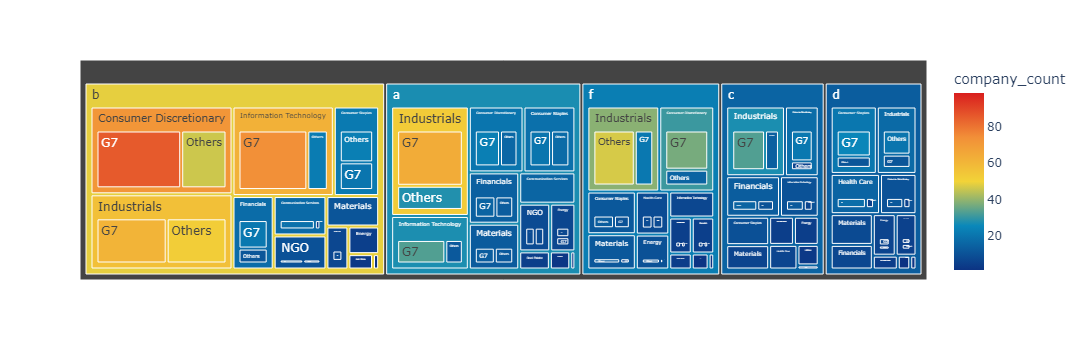

In [18]:
agg_data = df.groupby(['G7', 'industry', 'yaleGrade']).size().reset_index(name='company_count')
fig = px.treemap(
    agg_data, 
    path=['yaleGrade', 'industry', 'G7'], 
    values='company_count', 
    color='company_count', 
    color_continuous_midpoint=50, 
    color_continuous_scale=px.colors.diverging.Portland
    )
fig.show()

As we can see from the tree map diagram above, 
- the total amount of comnnaiens decided to withdraw from russia is greater than the number of the companies decided to continue their 'business as usual'
- the biggest clusters of the companies that followed the exodus from russia are **'grade b - Consumer Discretionary - G7', 'grade b - Consumer Discretionary - Other countries', 'grade b - Information Technology - G7', 'grade b - Industrials - G7', 'grade b - Industrials - Other companies', and 'grade a - Industrials - G7'**
- the biggest clusters of the companies that decided to stay in russia is **'grade f - Industrials - Other companies'**

# <div style="color:white;background-color:#1d1545;padding:5%;font-size:1.3em;text-align:center;text-shadow:2px 2px 4px black"> Deeper Dives Into Individual Industries </div>

In this section, we are going to review the patterns to do the 'business as usual' in the industries below
- Consumer Discretionary
- Consumer Staples
- Energy
- Financials
- Health Care
- Industrials
- Materials

## <div style="font-size:20px;text-align:center;color:black;border-bottom:5px #0026d6 solid;padding-bottom:3%">Consumer Discretionary</div>

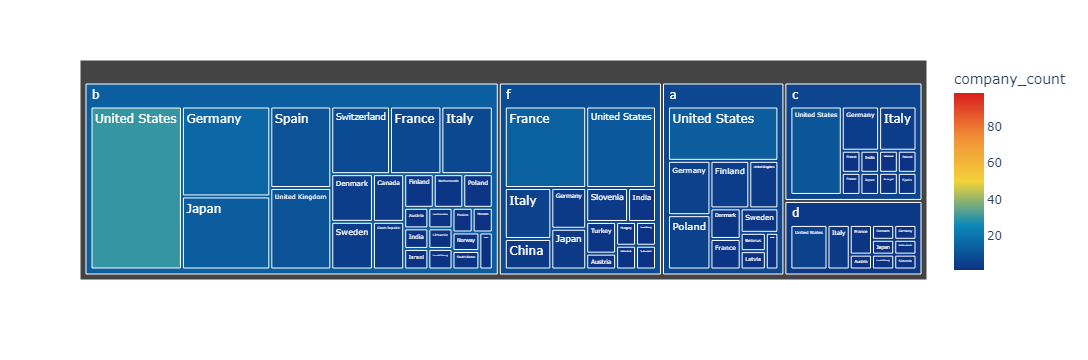

In [19]:
industry_df = df[df['industry'] == 'Consumer Discretionary'] 

agg_data = industry_df.groupby(['country', 'yaleGrade']).size().reset_index(name='company_count')

fig = px.treemap(
    agg_data, 
    path=['yaleGrade', 'country'], 
    values='company_count', 
    color='company_count', 
    color_continuous_midpoint=50, 
    color_continuous_scale=px.colors.diverging.Portland
    )
fig.show()

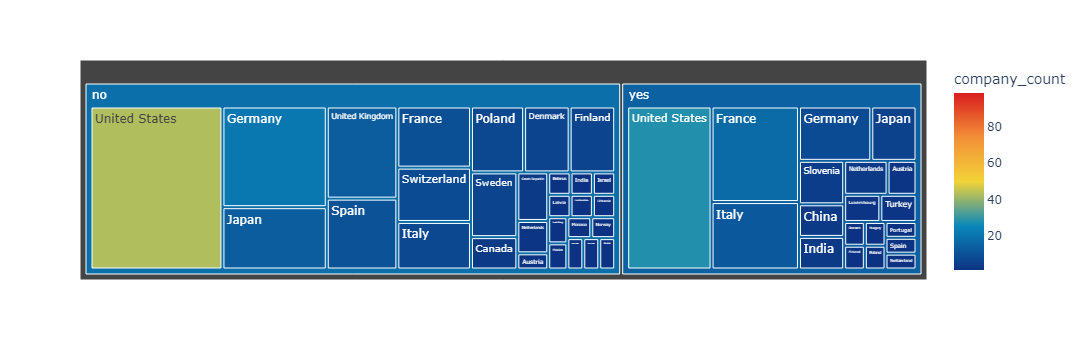

In [20]:
agg_data = industry_df.groupby(['country', 'still_operates']).size().reset_index(name='company_count')

fig = px.treemap(
    agg_data, 
    path=['still_operates', 'country'], 
    values='company_count', 
    color='company_count', 
    color_continuous_midpoint=50, 
    color_continuous_scale=px.colors.diverging.Portland
    )
fig.show()

As displayed in the charts above, the companies from *Consumer Discretionary* industry are more inclined to exit from russia recently. The most active in terms of exodus from russia are headqutered in

- US
- Germany
- Japan
- UK
- Spain

In turn, the companies from this industry that decided to stay in russia are headquatered  in
- US (much less than the number of the US companies to exit from russia though)
- France
- Italy
- Germany (much less than the number of the German companies to exit from russia)
- Janap (much less than the number of the Japaneese companies to exit from russia)

## <div style="font-size:20px;text-align:center;color:black;border-bottom:5px #0026d6 solid;padding-bottom:3%">Consumer Staples</div>

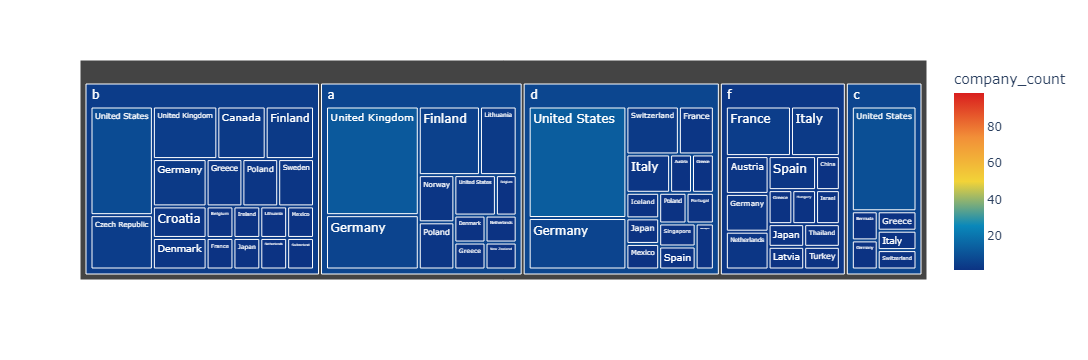

In [21]:
industry_df = df[df['industry'] == 'Consumer Staples'] 

agg_data = industry_df.groupby(['country', 'yaleGrade']).size().reset_index(name='company_count')

fig = px.treemap(
    agg_data, 
    path=['yaleGrade', 'country'], 
    values='company_count', 
    color='company_count', 
    color_continuous_midpoint=50, 
    color_continuous_scale=px.colors.diverging.Portland
    )
fig.show()

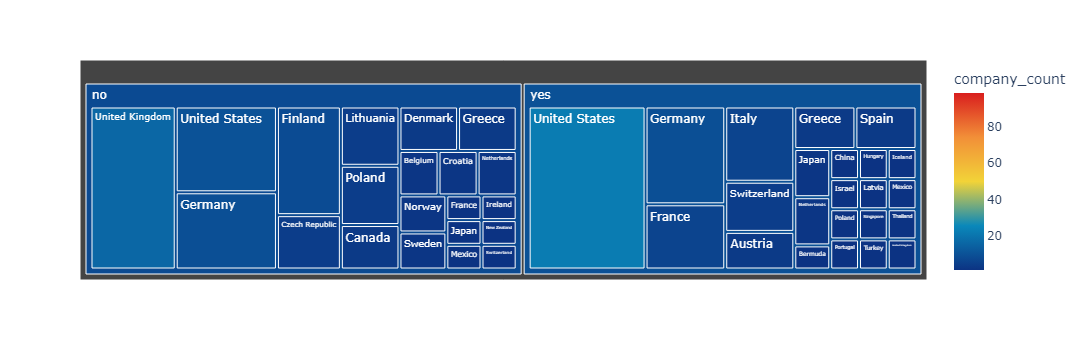

In [22]:
agg_data = industry_df.groupby(['country', 'still_operates']).size().reset_index(name='company_count')

fig = px.treemap(
    agg_data, 
    path=['still_operates', 'country'], 
    values='company_count', 
    color='company_count', 
    color_continuous_midpoint=50, 
    color_continuous_scale=px.colors.diverging.Portland
    )
fig.show()

As displayed in the charts above, the companies from *Consumer Staples* industry splitted into almost two equal groups

- those how decided to exit
- those who continued to do the 'business as usual'

The most active companies, in terms of exodus from russia, are the  ones headqutered in
- UK
- US
- Germany
- Finland

The companies that decided to stay are mostly headquarted in
- US
- Germany
- France
- Italy

## <div style="font-size:20px;text-align:center;color:black;border-bottom:5px #0026d6 solid;padding-bottom:3%">Energy</div>

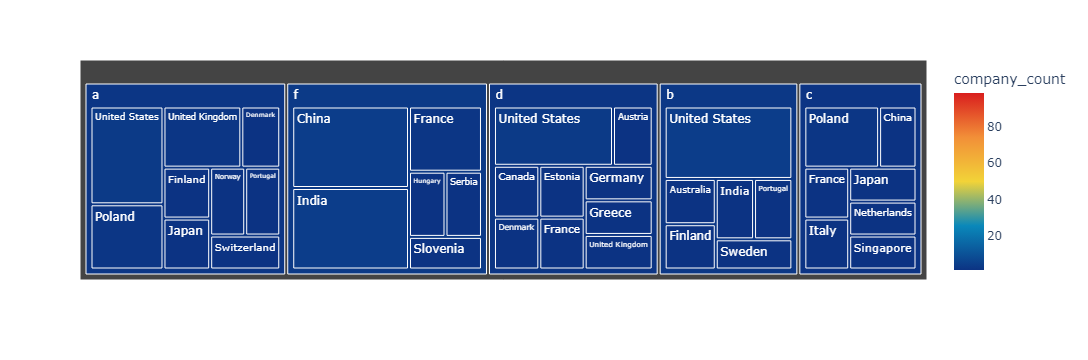

In [23]:
industry_df = df[df['industry'] == 'Energy'] 

agg_data = industry_df.groupby(['country', 'yaleGrade']).size().reset_index(name='company_count')

fig = px.treemap(
    agg_data, 
    path=['yaleGrade', 'country'], 
    values='company_count', 
    color='company_count', 
    color_continuous_midpoint=50, 
    color_continuous_scale=px.colors.diverging.Portland
    )
fig.show()

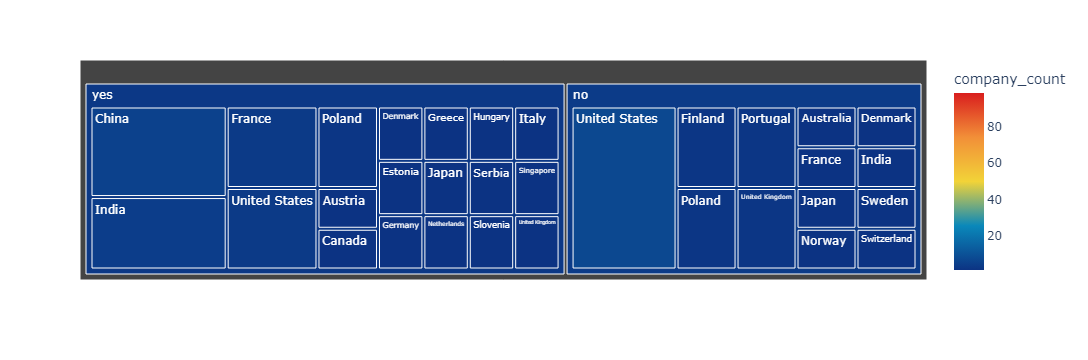

In [24]:
agg_data = industry_df.groupby(['country', 'still_operates']).size().reset_index(name='company_count')

fig = px.treemap(
    agg_data, 
    path=['still_operates', 'country'], 
    values='company_count', 
    color='company_count', 
    color_continuous_midpoint=50, 
    color_continuous_scale=px.colors.diverging.Portland
    )
fig.show()

As displayed in the charts above, the companies from *Energy* industry are more inclined to stay in russia.

The most active companies, in terms of exodus from russia, are the  ones headqutered in
- US
- Finland
- Poland
- Portugal
- UK

The companies that decided to stay are mostly headquarted in
- China
- India
- France
- US
- Poland

## <div style="font-size:20px;text-align:center;color:black;border-bottom:5px #0026d6 solid;padding-bottom:3%">Financials</div>

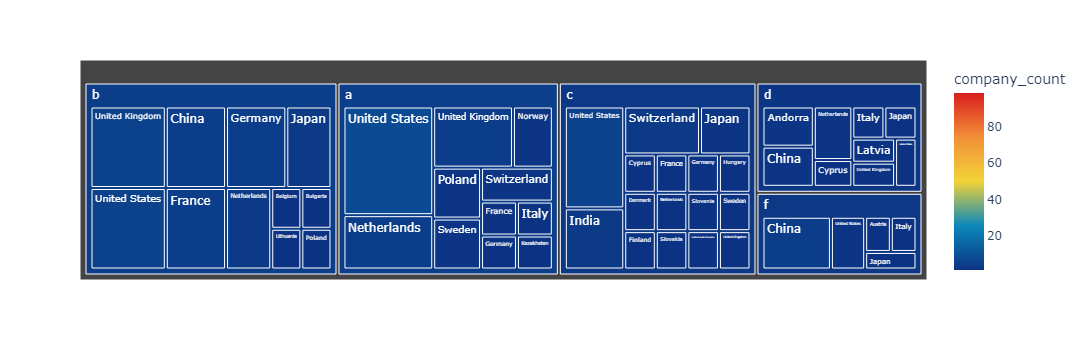

In [25]:
industry_df = df[df['industry'] == 'Financials'] 

agg_data = industry_df.groupby(['country', 'yaleGrade']).size().reset_index(name='company_count')

fig = px.treemap(
    agg_data, 
    path=['yaleGrade', 'country'], 
    values='company_count', 
    color='company_count', 
    color_continuous_midpoint=50, 
    color_continuous_scale=px.colors.diverging.Portland
    )
fig.show()

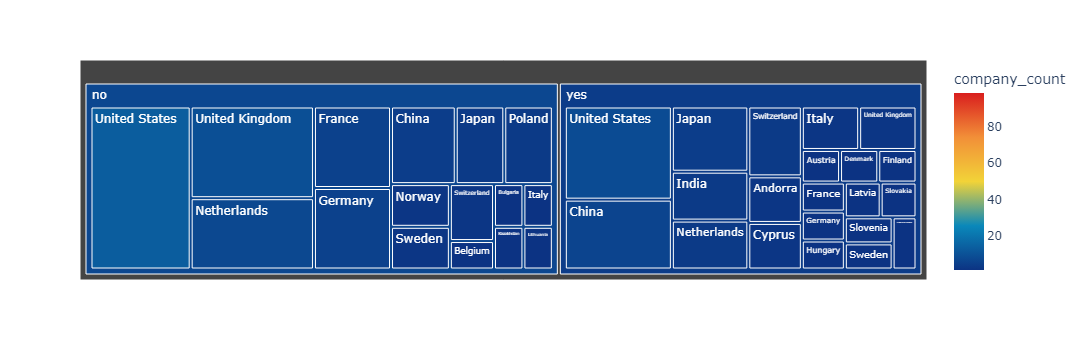

In [26]:
agg_data = industry_df.groupby(['country', 'still_operates']).size().reset_index(name='company_count')

fig = px.treemap(
    agg_data, 
    path=['still_operates', 'country'], 
    values='company_count', 
    color='company_count', 
    color_continuous_midpoint=50, 
    color_continuous_scale=px.colors.diverging.Portland
    )
fig.show()

As displayed in the charts above, the companies from *Financials* industry are more inclined to exit from russia.

The most active companies, in terms of exodus from russia, are the  ones headqutered in
- US
- UK
- Netherlands
- France
- Germany
- China

The companies that decided to stay are mostly headquarted in
- US
- China
- Japan
- India
- Netherlands
- Switzerland

## <div style="font-size:20px;text-align:center;color:black;border-bottom:5px #0026d6 solid;padding-bottom:3%">Health Care</div>

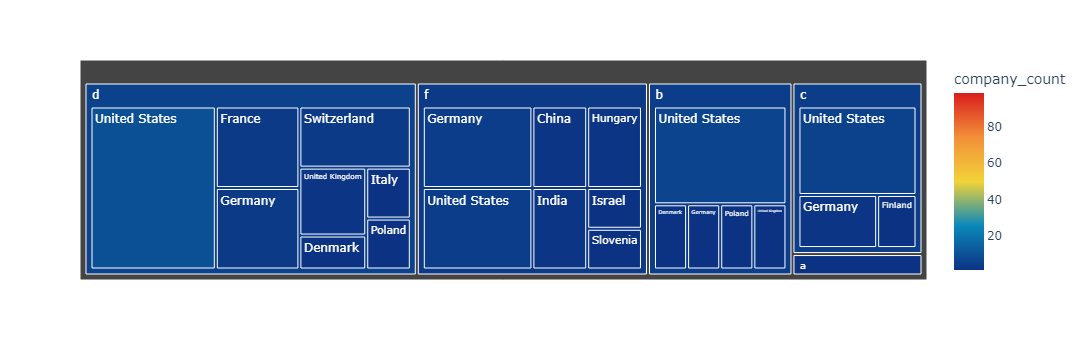

In [27]:
industry_df = df[df['industry'] == 'Health Care'] 

agg_data = industry_df.groupby(['country', 'yaleGrade']).size().reset_index(name='company_count')

fig = px.treemap(
    agg_data, 
    path=['yaleGrade', 'country'], 
    values='company_count', 
    color='company_count', 
    color_continuous_midpoint=50, 
    color_continuous_scale=px.colors.diverging.Portland
    )
fig.show()

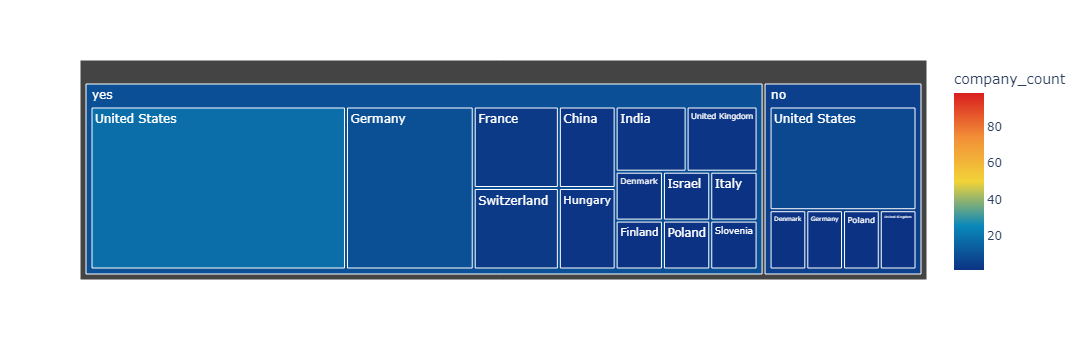

In [28]:
agg_data = industry_df.groupby(['country', 'still_operates']).size().reset_index(name='company_count')

fig = px.treemap(
    agg_data, 
    path=['still_operates', 'country'], 
    values='company_count', 
    color='company_count', 
    color_continuous_midpoint=50, 
    color_continuous_scale=px.colors.diverging.Portland
    )
fig.show()

As we can see, the majority of the global players in *Health Care* industry decided to stay in russia. Their officially stated motivation is to care about the humanitarian matters and people in russia who, as they controversly believe, are not in charge of what their top authories do in terms of the cruel aggression in Ukraine.

## <div style="font-size:20px;text-align:center;color:black;border-bottom:5px #0026d6 solid;padding-bottom:3%">Industrials</div>

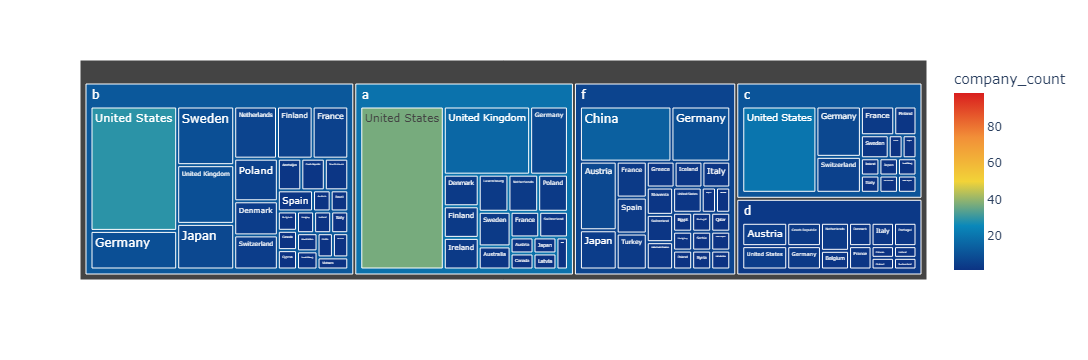

In [29]:
industry_df = df[df['industry'] == 'Industrials'] 

agg_data = industry_df.groupby(['country', 'yaleGrade']).size().reset_index(name='company_count')

fig = px.treemap(
    agg_data, 
    path=['yaleGrade', 'country'], 
    values='company_count', 
    color='company_count', 
    color_continuous_midpoint=50, 
    color_continuous_scale=px.colors.diverging.Portland
    )
fig.show()

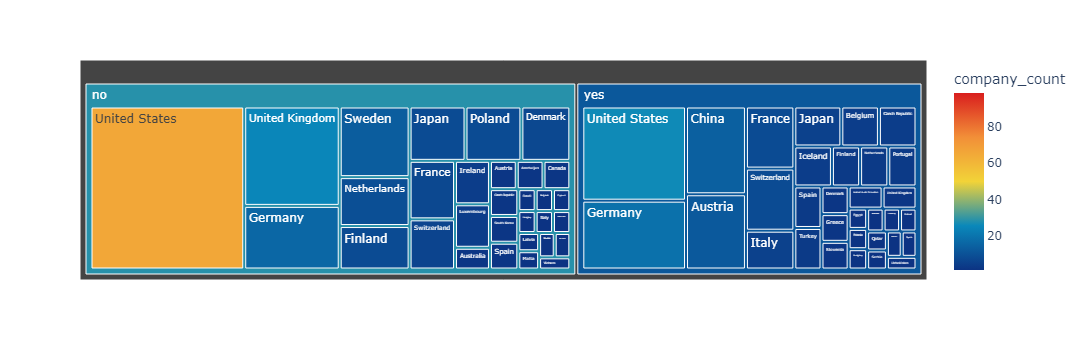

In [30]:
agg_data = industry_df.groupby(['country', 'still_operates']).size().reset_index(name='company_count')

fig = px.treemap(
    agg_data, 
    path=['still_operates', 'country'], 
    values='company_count', 
    color='company_count', 
    color_continuous_midpoint=50, 
    color_continuous_scale=px.colors.diverging.Portland
    )
fig.show()

As displayed in the charts above, the companies from *Industrials* industry are more inclined to exit from russia.

The most active companies, in terms of exodus from russia, are the  ones headqutered in
- US
- UK
- Germany
- Sweden

The companies that decided to stay are mostly headquarted in
- US
- Germany
- China
- Austria

## <div style="font-size:20px;text-align:center;color:black;border-bottom:5px #0026d6 solid;padding-bottom:3%">Materials</div>

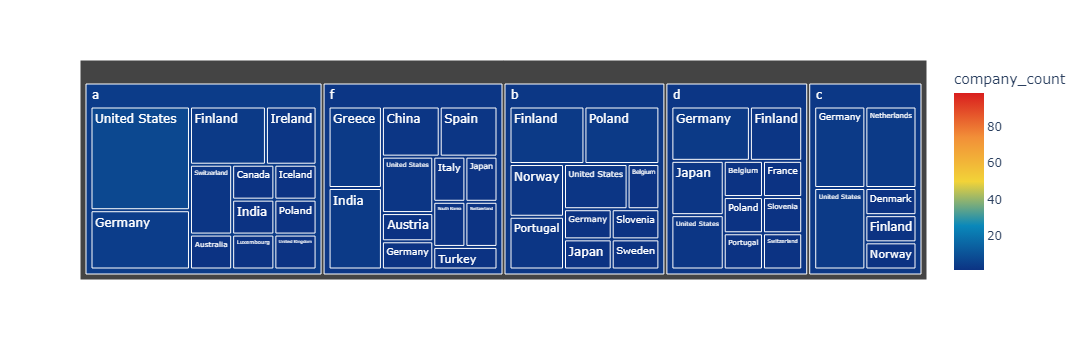

In [31]:
industry_df = df[df['industry'] == 'Materials'] 

agg_data = industry_df.groupby(['country', 'yaleGrade']).size().reset_index(name='company_count')

fig = px.treemap(
    agg_data, 
    path=['yaleGrade', 'country'], 
    values='company_count', 
    color='company_count', 
    color_continuous_midpoint=50, 
    color_continuous_scale=px.colors.diverging.Portland
    )
fig.show()

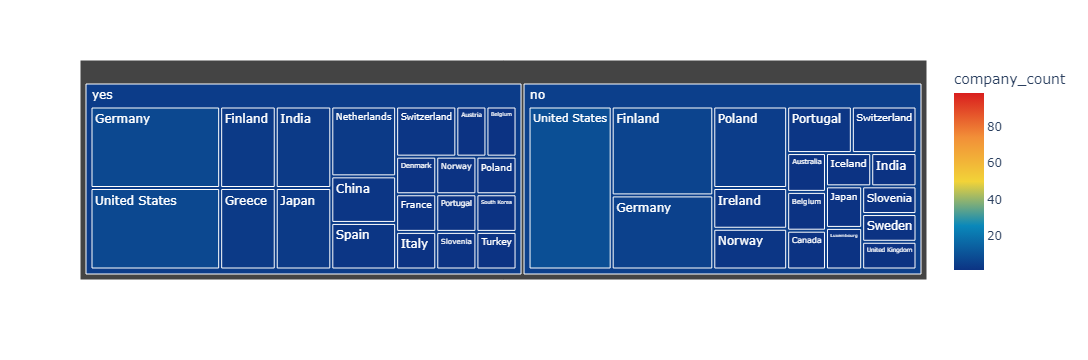

In [32]:
agg_data = industry_df.groupby(['country', 'still_operates']).size().reset_index(name='company_count')

fig = px.treemap(
    agg_data, 
    path=['still_operates', 'country'], 
    values='company_count', 
    color='company_count', 
    color_continuous_midpoint=50, 
    color_continuous_scale=px.colors.diverging.Portland
    )
fig.show()

As displayed in the charts above, the companies from *Materials* are equally split into those who exit from russia and those who continues their operations there.

The most active companies, in terms of exodus from russia, are the  ones headqutered in
- Germany
- US

The companies that decided to stay are mostly headquarted in
- US
- Finland
- Germany
- Poland

# <div style="color:white;background-color:#1d1545;padding:5%;font-size:1.3em;text-align:center;text-shadow:2px 2px 4px black">Discussion of the Results Observed</div>

We can see that the majority of the companies within the dataset is embarked on either full or significant exit from russia (*yaleGrade = 'a' or 'b'*). The relative fraction of such companies within G7 countries is much bigger then in the rest of the world. We can interprete it as an inclanation of the business elites within the global companies to support the values of democracy, freedom and non-tolerance to the state terrorism as opposed to the aggressive totalirism and terrorism manifested by russian aggression in Ukraine.

At the same time, we can see the cluster of countries that tend to either support russian aggression , whether directly or indirectly (like China), or simply get short-term benefits from operating in the russian markets at the time of the massive exodus of the global players from it (India, Brasil, and some of EU countries that see the post-war world order to be WITH RUSSIA rather then AGAINST RUSSIA - Italy, France, and, to less and less extent over time, Germany).

In terms of the industries, we see that
- the biggest clusters of the companies that followed the exodus from russia are **'grade b - Consumer Discretionary - G7', 'grade b - Consumer Discretionary - Other countries', 'grade b - Information Technology - G7', 'grade b - Industrials - G7', 'grade b - Industrials - Other companies', and 'grade a - Industrials - G7'**
- the biggest clusters of the companies that decided to stay in russia is **'grade f - Industrials - Other companies'**

At the same time, we can see that many decisions (especially in *Energy* and *Financials*) are dictated by political reasos of 'real politics' rather then by value-driven decisions of the top managers of the respective countries. For example,

- Chineese and Indian financial institutions/companies have to massively exit from russia due the risk of being exposed to the secondary sanctions of the US, UK, and EU
- Relatively big percentage of Western companies in the *Energy* industry that decided to continue their operations in russia are driven by the nature of oil/gas production, factored in by the politically-driven decisions ( (1) capping the top price of the Urals oil and gas produced in russia; (2) limitations to the nuclear energy operations with/in russia; (3) collateral financial restrictions toward the energy-related transactions with russian companies etc.).

This report provides the comprehensive outline on HOW global companies work on their exodus from russia amid the cruel invasion and war it started in Ukraine. However, the data in the original Yale SOM dataset do not have sufficient infromation about WHY we see what we see.

There are both the value- and policy-driven factors that make an impact on the decision of the businesses to exit from russia amid its cruel aggression against Ukraine. 